# Haberman Analysis

## Summary
We will analyze the cases of Breast Cancer who had undergone surgeries during 1958 to 1970.
The aim will be to investigate if any of the provided features help us predict if a person will survive for less than or more than 5 years.

## Importing the data and Understanding it
We will import the data using the famous pandas library and try to find some statistics of the data.

In [153]:
import pandas as pd

In [154]:
haberman = pd.read_csv("../datasets/haberman.csv")

Now that we have our data loaded, lets check the columns/features that we are going to explore 

In [155]:
haberman.columns

Index([u'age', u'year', u'axillary', u'survived'], dtype='object')

Let's also check how many data points do we have, more the data points, complex the analysis but smoother the vizzes.

In [156]:
haberman.shape

(306, 4)

Total No of rows: 306 => data points
  <br>
Total No of cols: 4 => features

Now that we have seen the skeleton of the data, let's see what runs inside the skeleton by checking the first few data points.

In [157]:
haberman.head(10)

,age,year,axillary,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [158]:
haberman['survived'].value_counts()

1    225
2     81
Name: survived, dtype: int64

Of the total 306 women, 225 survived for more than 5 years and 81 for less than 5 years. 

Let's also see some statistics about the data, the mean, max, min, etc values for each of the features.

In [159]:
haberman.describe()

,age,year,axillary,survived
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Let's try to understand each of the statistic one by one.

1. **Count**
  <br>
This specifies the number of records that we have, we already know there are 306 of them
  <br>
  
2. **Mean**
  <br>
This specifies the average of all the datapoints for a particular field/feature/column
So, one statistic that is clear is that the average age of the women who underwent the surgery was ~52.
  <br>
  
3. **Std**
  <br>
The standard deviation of each of the fields. This actually tells us how much dispersion is there in the data points. When I tried to find out which kind of standard deviation does pandas give, it turns out that internally pandas uses series.std() which gives "sample standard deviation". Please check references section for more details.
  <br>
  
4. **Min and Max**
  <br>
These two values actually allow us to know if some data points are farther away from the mean. 
  <br>For ex: you can see that, the mean(axillary) is ~4 where as the max(axillary) = 52.
So the min and max can be used to just a gist of the outliers in the data.

5. **Percentiles (25%, 50%, 75%)**
  <br>
The percentile calculation is done as below:
  <br>
Let's say our data is 1,2,3,4 and we want to find the 25%, 50% and 75%.
  <br>
25% = 1.75 => (1+(4-1)*25/100)
  <br>
50% = 2.5  => (1+(4-1)*50/100)
  <br>
75% = 3.25 => (1+(4-1)*75/100)
  <br>
By default, the percentile calculation is linear.

## Data Cleaning

The first thing I noticed after seeing the data was that year were shown as 58, 59 ..., 69 assuming that 1900
is the base. However, it makes more sense to convert it so that it looks like 1958, 1959 .. for better understanding of the audience as well as ourselves since we are used to looking at years in YYYY format. 
  <br>
I converted the data as shown in below steps.

In [160]:
haberman['year'] = 1900 + haberman['year']

In [161]:
haberman.head(10)

,age,year,axillary,survived
0,30,1964,1,1
1,30,1962,3,1
2,30,1965,0,1
3,31,1959,2,1
4,31,1965,4,1
5,33,1958,10,1
6,33,1960,0,1
7,34,1959,0,2
8,34,1966,9,2
9,34,1958,30,1


Another change according to me is needed in the 'survived' column.
  <br>
I think that, while plotting the survived columns, '1' and '2' values for survived would make less sense. So I added a new field which was set as below:
  <br>
More than 5 years if survived = 1
Less than 5 years if survived = 2

Below are the steps I used.

In [164]:
def set_survival(row):
  if row['survived'] == 1:
    return 'More than 5 years'
  else:
    return 'Less than 5 years'

In [165]:
haberman['survival'] = haberman.apply(lambda row: set_survival(row), axis=1)

In [167]:
#let's see how the dataframe looks like after the change
haberman.head(10)

,age,year,axillary,survived,survival
0,30,1964,1,1,More than 5 years
1,30,1962,3,1,More than 5 years
2,30,1965,0,1,More than 5 years
3,31,1959,2,1,More than 5 years
4,31,1965,4,1,More than 5 years
5,33,1958,10,1,More than 5 years
6,33,1960,0,1,More than 5 years
7,34,1959,0,2,Less than 5 years
8,34,1966,9,2,Less than 5 years
9,34,1958,30,1,More than 5 years


This looks more readable than before. Let's move ahead and plot some graphs.

## Plots

In [168]:
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

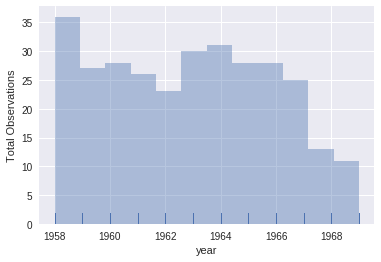

In [169]:
#Let's start by checking how many observations were made each year.
sns.distplot(haberman['year'], bins=12, kde=False, rug=True).set(ylabel='Total Observations')

It seems, the inaugral year i.e. 1958 saw most number of observations

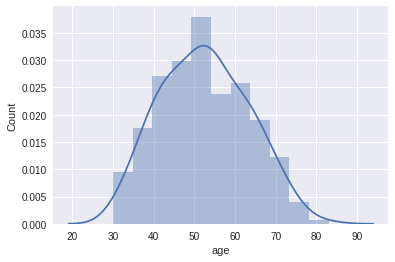

In [170]:
# We know that age is a natural phenomenon and can expect it show a normal distribution
sns.distplot(haberman['age']).set(ylabel='Count')

As expected, we can see a Normal/Gaussian distribution for ages.  <br>We can see the bell curve generated.  <br>The number of bins can be altered to make the distribution smoother, but it also demands a high volume of data.

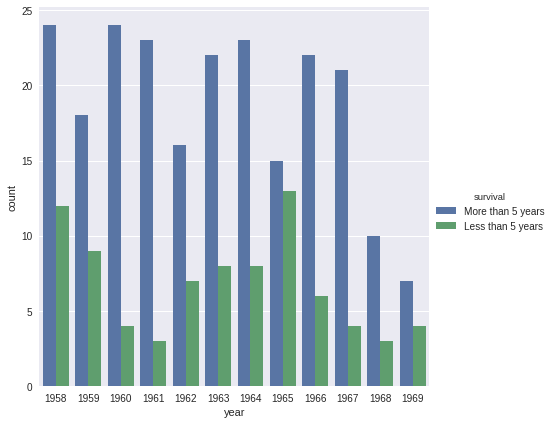

In [172]:
#let's also examine the survival rate per year.
sns.factorplot(data=haberman, x='year', kind='count', hue='survival', size=6)

It is evident as expected that the number of survival of more than 5 years is high for each year except 1965 where the gap seems to be lesser.

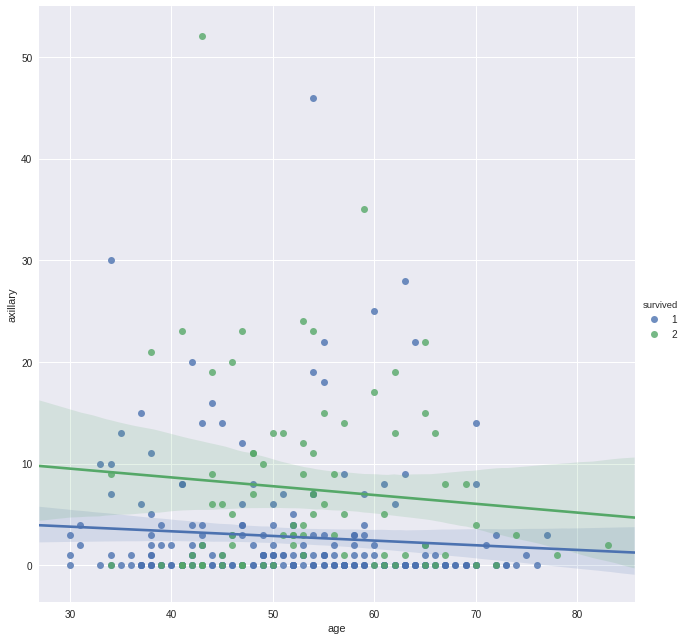

In [174]:
#It is important that we find if age and axillary were in anyway together responsible for the survival.
sns.lmplot(data=haberman, x='age', y='axillary', hue='survived', size=9)

This scatter plot actually shows that, less no of axillary actually led to survival of more than 5 years. Though it is not much clear by looking at the data points, it does make sense after looking at the green and blue lines.

## References
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.std.html
- https://math.stackexchange.com/questions/15098/sample-standard-deviation-vs-population-standard-deviation
- https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php
- https://en.wikipedia.org/wiki/Quartile
- https://github.com/pandas-dev/pandas/blob/master/pandas/core/series.py
- http://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot
- https://seaborn.pydata.org/generated/seaborn.countplot.html
- https://seaborn.pydata.org/tutorial.html